7.1 Solution

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns
import rioxarray as rxr
import xarray as xr
import geopandas as gpd
from shapely.geometry import mapping

#first let's try to laod both RED and NIR:
#7.1.1

red=rxr.open_rasterio("data/2023-02-22-sentinel-2-red-band.tiff", masked=True).squeeze()
nir=rxr.open_rasterio("data/2023-02-22-sentinel-2-NIR-band.tiff", masked=True).squeeze()

#checking for bounds, resolution and CRS to be the same in both datasets:

# Are the bounds the same?
print("Is the spatial extent the same?",
      red.rio.bounds() == nir.rio.bounds())

# Is the resolution the same ??
print("Is the resolution the same?",
      red.rio.resolution() == nir.rio.resolution())

# Is the crs the same??

print("The crs is", red.rio.crs)
print("The crs is", nir.rio.crs)

Is the spatial extent the same? True
Is the resolution the same? True
The crs is EPSG:4326
The crs is EPSG:4326


In [2]:
#Now we are calculating nvdi and exporting it
#7.1.2:

ndvi = (nir-red)/(nir+red)
ndvi.rio.to_raster("data/2023-02-22-sentinel-2-NDVI.tiff")

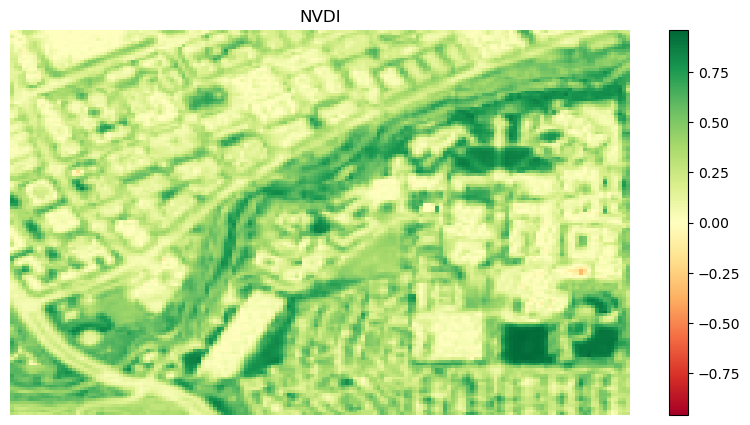

In [3]:
#Plotting ndvi
#7.1.3

f, ax = plt.subplots(figsize=(10, 5))
ndvi.plot(cmap="RdYlGn")
ax.set(title="NVDI")
ax.set_axis_off()
plt.show()

The most direct pattern in the map, is how anything that is darker green is where there is little to no construction. Green spaces that have not been manipulated. We can notice this by seeing that lighter greens are areas like playa vista right next to LMU Campus, and LMU Buildings themselves.


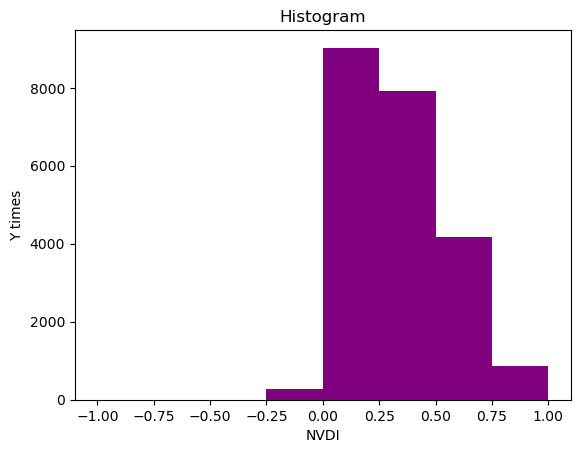

Max: 0.95758915
Min: -0.3420191


In [4]:
#Let's now create a histogram
#7.1.4

f, ax = plt.subplots()
ndvi.plot.hist(color="purple",
                        bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
ax.set(title="Histogram",
       xlabel="NVDI",
       ylabel="Y times")

plt.show()

print("Max:", ndvi.max().values)
print("Min:", ndvi.min().values)

The close to 0, you see a peak in frequency and as you cross the 0.00 line, it starts a downtrend towards one. 

7.2 Solution

In [5]:
#7.2.1
class_bins = [-np.inf, 0, 0.2, 0.5, np.inf]
class_bins

ndvi_reclass=np.digitize(ndvi, bins=class_bins, right=True)

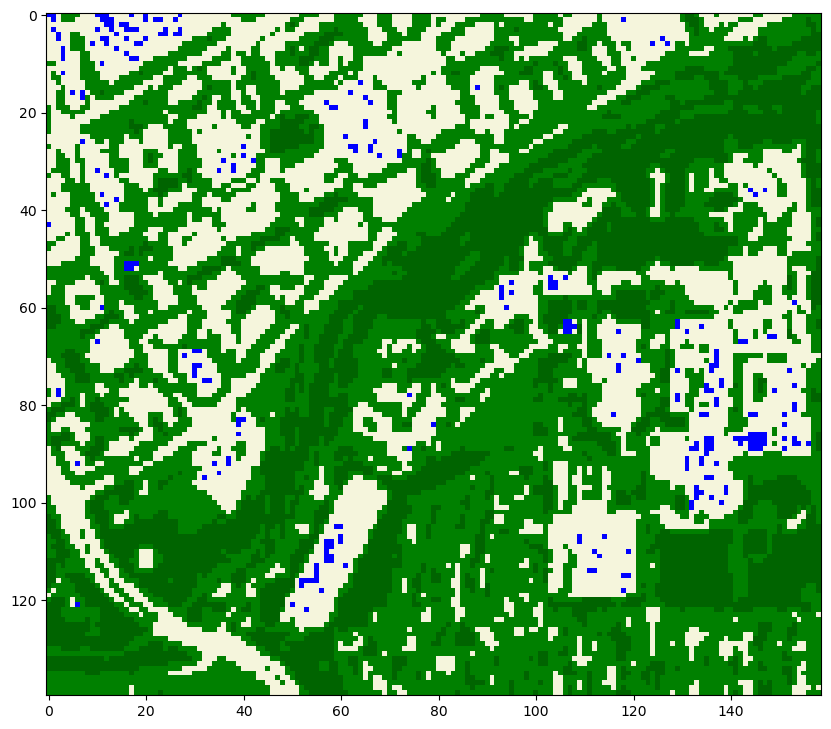

In [6]:
#7.2.2
#Let's plot

colors = ['blue', 'beige', 'green', 'darkgreen']
class_bins = [0.5, 1.5, 2.5, 3.5, 4.5]
cmap=ListedColormap(colors)
fig, ax=plt.subplots(figsize=(10,10))
ax.imshow(ndvi_reclass, cmap=cmap)

The map does very well in distinguishing areas that are dense in vegetation, versus other areas where there is water and also different surface cover. Where I do see some limitations though, is in distinguishing places of the map where there might be low vegetation and other type of cover. There might be some streets for example that I believe are there and are shown as purely vegetation in the map. Some cases due to maybe trees covering certain roads? Could this be an example? 

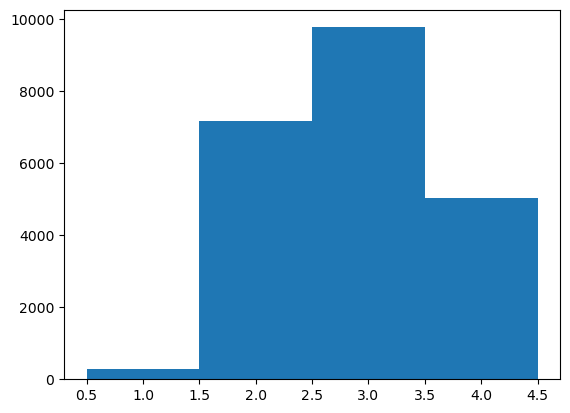

In [7]:
#7.2.3

plt.hist(ndvi_reclass.flatten(), bins=4, range=(0.5, 4.5))

n_pixels = ndvi_reclass.size
water = (ndvi_reclass[ndvi_reclass == 0].size / n_pixels) * 100
urban_barren = ((ndvi_reclass[(ndvi_reclass > 0) & (ndvi_reclass <= 0.2)].size / n_pixels) * 100)
low_vegetation= ((ndvi_reclass[(ndvi_reclass > 0.2) & (ndvi_reclass <= 0.5)].size / n_pixels) * 100)
high_vegetation = ((ndvi_reclass[ndvi_reclass > 0.5].size / n_pixels) * 100)

